# Complexity reduction techniques with genomic data

this is the companion colab code for my tutorial in medium about complexity reduction techniques in Python with genomic data, please read the article for better understanding of the code. Here I am providing just generic information

[Medium article](https://medium.com/leukemiaairesearch/complexity-reduction-techniques-with-gene-expression-data-961491979bc8)

for other stories check my medium profile:
[Salvatore Raieli](https://salvatore-raieli.medium.com/)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [ ]:
#dataset
data = pd.read_table("/content/gdrive/My Drive/aml/201028_GSE122505_Leukemia_clean.txt", sep = "\t")

In [ ]:
#table of the disease
data.disease.value_counts()

AML                                         969
ALL                                         906
Infection                                   113
CLL                                          85
healthy                                      82
Diabetes_Type_I                              74
AMKL                                         63
Diabetes_Type_II                             29
CML                                          22
clinically_isolated_syndrome                 18
MDS                                          10
DS_transient_myeloproliferative_disorder      8
Name: disease, dtype: int64

In [ ]:
#removing some disease type
data["disease"] = np.where(data["disease"] == "Diabetes_Type_I" , "Diabetes", data["disease"])
data["disease"] = np.where(data["disease"] == "Diabetes_Type_II" , "Diabetes", data["disease"])
other = ['CML','clinically_isolated_syndrome', 'MDS', 'DS_transient_myeloproliferative_disorder']
data = data[~data.disease.isin(other)]
data.shape 

(2321, 14211)

In [ ]:
#selecting target variable
target = data["disease"]
df = data.drop("disease", 1)
df = df.drop("GSM", 1)
df = df.drop("FAB", 1)
df.shape

(2321, 14208)

In [ ]:
target.value_counts()

AML          969
ALL          906
Infection    113
Diabetes     103
CLL           85
healthy       82
AMKL          63
Name: disease, dtype: int64

In [ ]:
df = df.drop(df.var()[(df.var() < 0.3)].index, axis=1)
from scipy.stats import zscore
df = df.apply(zscore)
df.shape

(2321, 4311)

## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit(df).transform(df)

print(pca.explained_variance_ratio_)

[0.16470097 0.10509818]


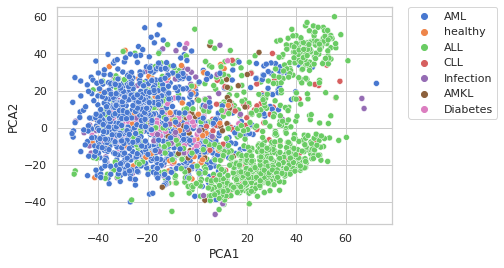

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(target)
y_lan = le.transform(target)

pca_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
pca_df["PCA1"] = X[:, 0]
pca_df["PCA2"] = X[:, 1]
pca_df["Disease"] = target
pca_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
#sns.set_theme(style="whitegrid")

ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Disease",  data=pca_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_PCA.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_PCA.png")
#pca_df.to_csv("GSE122505_Leukemia_PCA.csv")

## t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=48.0, learning_rate=200.0, n_iter=2000 )
X = tsne.fit_transform(df, y_lan)

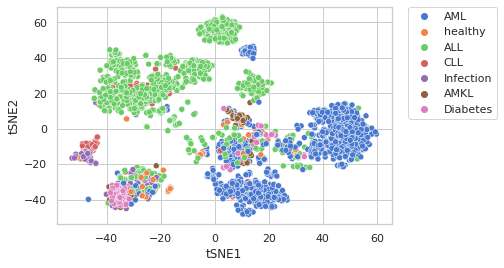

In [ ]:
tsne_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
tsne_df["tSNE1"] = X[:, 0]
tsne_df["tSNE2"] = X[:, 1]
tsne_df["Disease"] = target
tsne_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="tSNE1", y="tSNE2", hue="Disease",  data=tsne_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_tSNE.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_tSNE.png")
#tsne_df.to_csv("GSE122505_Leukemia_tSNE.csv")

In [ ]:
pca = PCA(n_components=50)
X_pca = pca.fit(df).transform(df)

tsne = TSNE(n_components=2, perplexity=48.0, learning_rate=200.0, n_iter=2000 )
X = tsne.fit_transform(X_pca, y_lan)

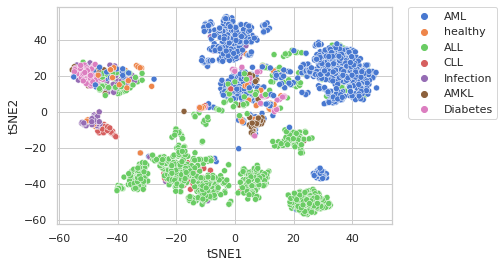

In [ ]:
tsne_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
tsne_df["tSNE1"] = X[:, 0]
tsne_df["tSNE2"] = X[:, 1]
tsne_df["Disease"] = target
tsne_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="tSNE1", y="tSNE2", hue="Disease",  data=tsne_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_PCA_tSNE.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_PCA_tSNE.png")
#tsne_df.to_csv("GSE122505_Leukemia_PCA_tSNE.csv")

## UMAP


In [ ]:
import umap
reducer = umap.UMAP(n_neighbors =  100, min_dist= 0.2, metric ="euclidean")
X = reducer.fit_transform(df)

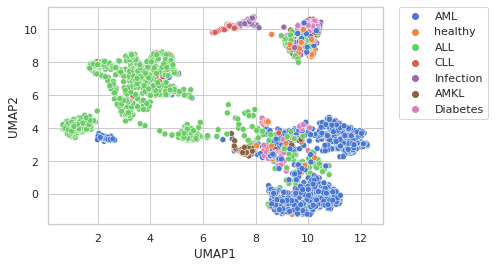

In [ ]:
umap_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
umap_df["UMAP1"] = X[:, 0]
umap_df["UMAP2"] = X[:, 1]
umap_df["Disease"] = target
umap_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="UMAP1", y="UMAP2", hue="Disease",  data=umap_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_UMAP.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_UMAP.png")
#ctrl_df.to_csv("GSE122505_Leukemia_UMAP.csv")


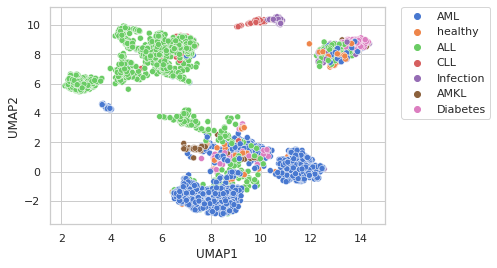

In [ ]:
pca = PCA(n_components=50)
X_pca = pca.fit(df).transform(df)

reducer = umap.UMAP(n_neighbors =  100, min_dist= 0.2, metric ="euclidean")
X = reducer.fit_transform(X_pca)

umap_df = pd.DataFrame(columns = ["x", "y", "name", "label"])
umap_df["UMAP1"] = X[:, 0]
umap_df["UMAP2"] = X[:, 1]
umap_df["Disease"] = target
umap_df["label"] = y_lan

sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="UMAP1", y="UMAP2", hue="Disease",  data=umap_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("GSE122505_Leukemia_PCA_UMAP.pdf", dpi = 300)
#plt.savefig("GSE122505_Leukemia_PCA_UMAP.png")
#ctrl_df.to_csv("GSE122505_Leukemia_PCA_UMAP.csv")


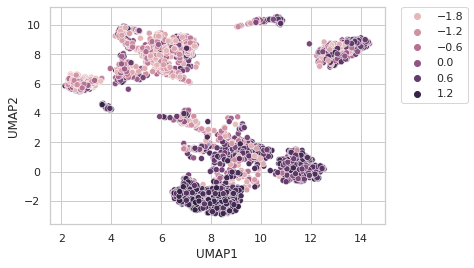

In [ ]:
umap_df["ANXA1"] = df["ANXA1"]
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="UMAP1", y="UMAP2", hue="ANXA1",  data=umap_df)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)